In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [129]:
data = pd.read_excel("Flight_Fare.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [43]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [44]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [45]:
data.dropna(subset=['Route'], inplace=True)  # drop the 1 missing route row
data['Total_Stops'].fillna('1 stop', inplace=True)  # fill missing stops logically, if it makes sense

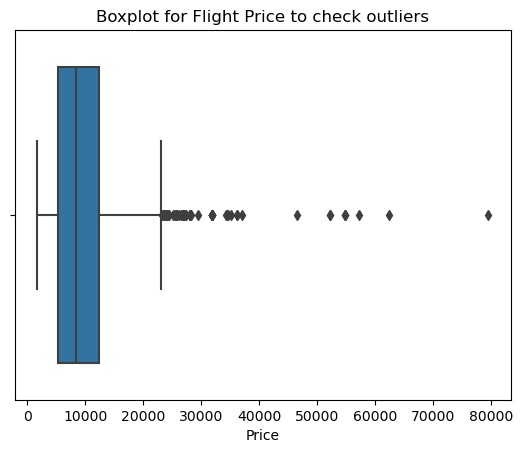

In [46]:
sns.boxplot(x='Price', data=data)
plt.title('Boxplot for Flight Price to check outliers')
plt.show()

In [47]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
print(outliers)

                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396          DEL → 

In [48]:
data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

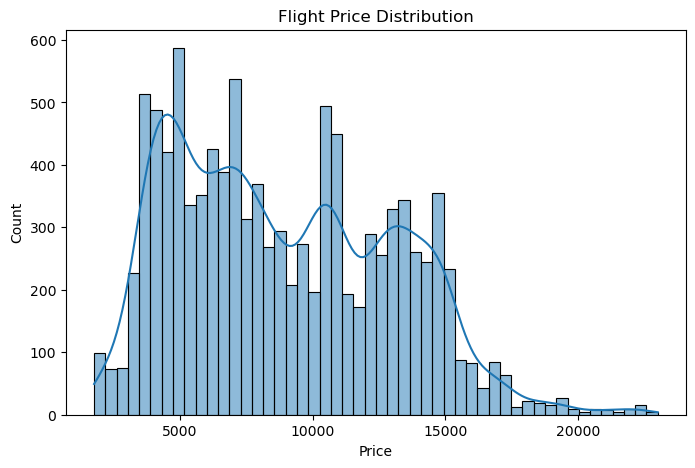

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.show()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10588 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10588 non-null  object
 1   Date_of_Journey  10588 non-null  object
 2   Source           10588 non-null  object
 3   Destination      10588 non-null  object
 4   Route            10588 non-null  object
 5   Dep_Time         10588 non-null  object
 6   Arrival_Time     10588 non-null  object
 7   Duration         10588 non-null  object
 8   Total_Stops      10588 non-null  object
 9   Additional_Info  10588 non-null  object
 10  Price            10588 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 992.6+ KB


In [51]:
data.shape

(10588, 11)

In [ ]:
# Convert Date_of_Journey to datetime type
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month

# Extract hours and minutes from Dep_Time and Arrival_Time
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Dep_hour'] = data['Dep_Time'].dt.hour
data['Dep_minute'] = data['Dep_Time'].dt.minute

data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')  # if format issues
data['Arrival_hour'] = data['Arrival_Time'].dt.hour
data['Arrival_minute'] = data['Arrival_Time'].dt.minute

# Process Duration column (like '2h 50m')
def fix_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    if 'm' not in x:
        x = x + ' 0m'
    return x

data['Duration'] = data['Duration'].apply(fix_duration)
data['Duration_hours'] = data['Duration'].str.extract('(\d+)h').astype(int)
data['Duration_mins'] = data['Duration'].str.extract('(\d+)m').astype(int)

In [ ]:
data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Route'], axis=1, inplace=True)

In [ ]:
# Convert Total_Stops to numeric
def convert_stops(x):
    if x == 'non-stop':
        return 0
    else:
        return int(x.split()[0])
data['Total_Stops'] = data['Total_Stops'].apply(convert_stops)
# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = model.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
# Linear Regression Evaluation
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

MAE: 1665.4885064458513
MSE: 4933960.797735355
RMSE: 2221.2520788364736
R2 Score: 0.698853114541687


In [111]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [112]:
y_pred = dt_model.predict(X_test)

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 682.0746773685868
MSE: 2318749.330329976
RMSE: 1522.7440133948896
R2 Score: 0.8584739182954336


In [114]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [115]:
# Predict with best estimator
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 717.1257923392837
RMSE: 1442.3315961816031
R2 Score: 0.873026551093735


In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
y_pred_rf = rf.predict(X_test)

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 599.2311817704906
MSE: 1348407.5964374037
RMSE: 1161.2095402800494
R2 Score: 0.9176992350280051


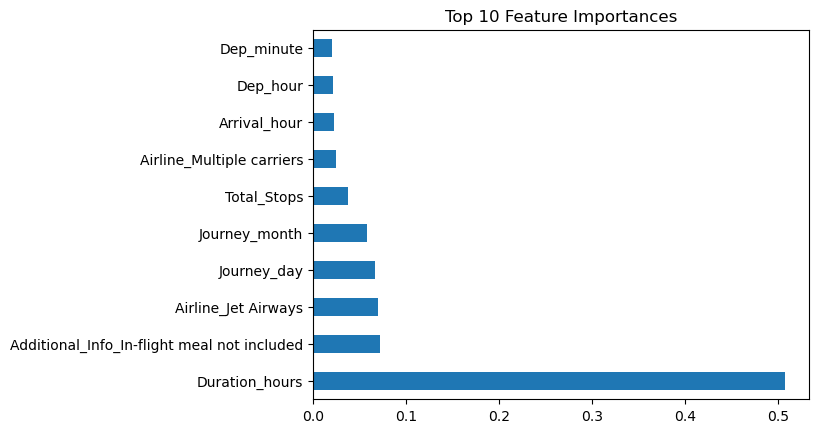

In [119]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [120]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
print("Best parameters:", rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}


In [121]:
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("R2 Score:", r2_score(y_test, y_pred_best_rf))

MAE: 662.8002971930342
RMSE: 1220.770592605806
R2 Score: 0.9090399271998132


In [122]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [123]:
y_pred_xgb = xg_reg.predict(X_test)

In [124]:
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

MAE: 642.0648529946072
RMSE: 1080.3931557272233
R2 Score: 0.9287563223498312


In [125]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7, 10],'learning_rate': [0.01, 0.05, 0.1, 0.2],'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_random = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_grid,n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)
print("Best parameters:", xgb_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [126]:
best_xgb = xgb_random.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_best_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_best_xgb))

MAE: 592.5795826970461
RMSE: 1057.2904573445917
R2 Score: 0.9317706386198474


In [127]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_xgb],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_xgb],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_xgb]
})
print(results)

               Model          MAE         RMSE  R2 Score
0  Linear Regression  1665.488506  1442.331596  0.698853
1      Decision Tree   717.125792  1442.331596  0.873027
2      Random Forest   662.249318  1219.446111  0.909237
3            XGBoost   592.579583  1057.290457  0.931771
